In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [2]:
print(tf.__version__)

2.17.0


# Explore data

In [11]:
import os
# Walk through pizza_steak directory and list number of files
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("C:/Users/mbres/Documents/stuff/PokemonData/train/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test data: ")
for dirpath, dirnames, filenames in os.walk("C:/Users/mbres/Documents/stuff/PokemonData/test/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 150 directories and 0 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/'.
There are 0 directories and 30 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Abra'.
There are 0 directories and 30 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Aerodactyl'.
There are 0 directories and 24 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Alakazam'.
There are 0 directories and 36 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Alolan Sandslash'.
There are 0 directories and 38 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Arbok'.
There are 0 directories and 36 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Arcanine'.
There are 0 directories and 44 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Articuno'.
There are 0 directories and 30 images in 'C:/Users/mbres/Documents/stuff/PokemonData/train/Beedrill'.
There are 0 directories and 36 images in 'C:/Users/mbres/Documents/stuff/

In [12]:
def view_random_image(target_dir, target_class):
  # We will view image from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")

  return img

Image shape (158, 156, 3)


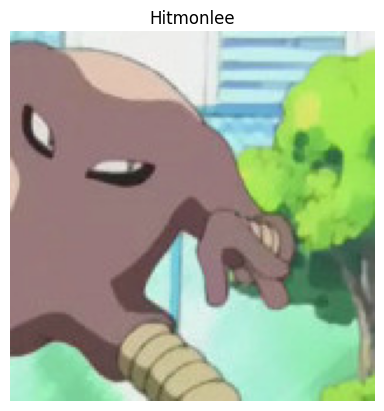

In [19]:
img = view_random_image(target_dir='C:/Users/mbres/Documents/stuff/PokemonData/train/',
                  target_class='Hitmonlee')

In [20]:
# Get the class name programmatically
import pathlib
data_dir = pathlib.Path("C:/Users/mbres/Documents/stuff/PokemonData/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Abra' 'Aerodactyl' 'Alakazam' 'Alolan Sandslash' 'Arbok' 'Arcanine'
 'Articuno' 'Beedrill' 'Bellsprout' 'Blastoise' 'Bulbasaur' 'Butterfree'
 'Caterpie' 'Chansey' 'Charizard' 'Charmander' 'Charmeleon' 'Clefable'
 'Clefairy' 'Cloyster' 'Cubone' 'Dewgong' 'Diglett' 'Ditto' 'Dodrio'
 'Doduo' 'Dragonair' 'Dragonite' 'Dratini' 'Drowzee' 'Dugtrio' 'Eevee'
 'Ekans' 'Electabuzz' 'Electrode' 'Exeggcute' 'Exeggutor' 'Farfetchd'
 'Fearow' 'Flareon' 'Gastly' 'Gengar' 'Geodude' 'Gloom' 'Golbat' 'Goldeen'
 'Golduck' 'Golem' 'Graveler' 'Grimer' 'Growlithe' 'Gyarados' 'Haunter'
 'Hitmonchan' 'Hitmonlee' 'Horsea' 'Hypno' 'Ivysaur' 'Jigglypuff'
 'Jolteon' 'Jynx' 'Kabuto' 'Kabutops' 'Kadabra' 'Kakuna' 'Kangaskhan'
 'Kingler' 'Koffing' 'Krabby' 'Lapras' 'Lickitung' 'Machamp' 'Machoke'
 'Machop' 'Magikarp' 'Magmar' 'Magnemite' 'Magneton' 'Mankey' 'Marowak'
 'Meowth' 'Metapod' 'Mew' 'Mewtwo' 'Moltres' 'MrMime' 'Muk' 'Nidoking'
 'Nidoqueen' 'Nidorina' 'Nidorino' 'Ninetales' 'Oddish' 'Omanyte'
 'Omastar' 'O

Image shape (597, 597, 3)
Image shape (224, 228, 3)
Image shape (213, 214, 3)
Image shape (208, 208, 3)
Image shape (140, 136, 3)
Image shape (174, 174, 3)
Image shape (488, 503, 3)
Image shape (195, 195, 3)
Image shape (97, 97, 3)
Image shape (876, 881, 3)
Image shape (280, 289, 3)
Image shape (191, 192, 3)
Image shape (152, 150, 3)
Image shape (490, 500, 3)
Image shape (878, 879, 3)
Image shape (882, 884, 3)
Image shape (410, 414, 3)
Image shape (674, 701, 3)


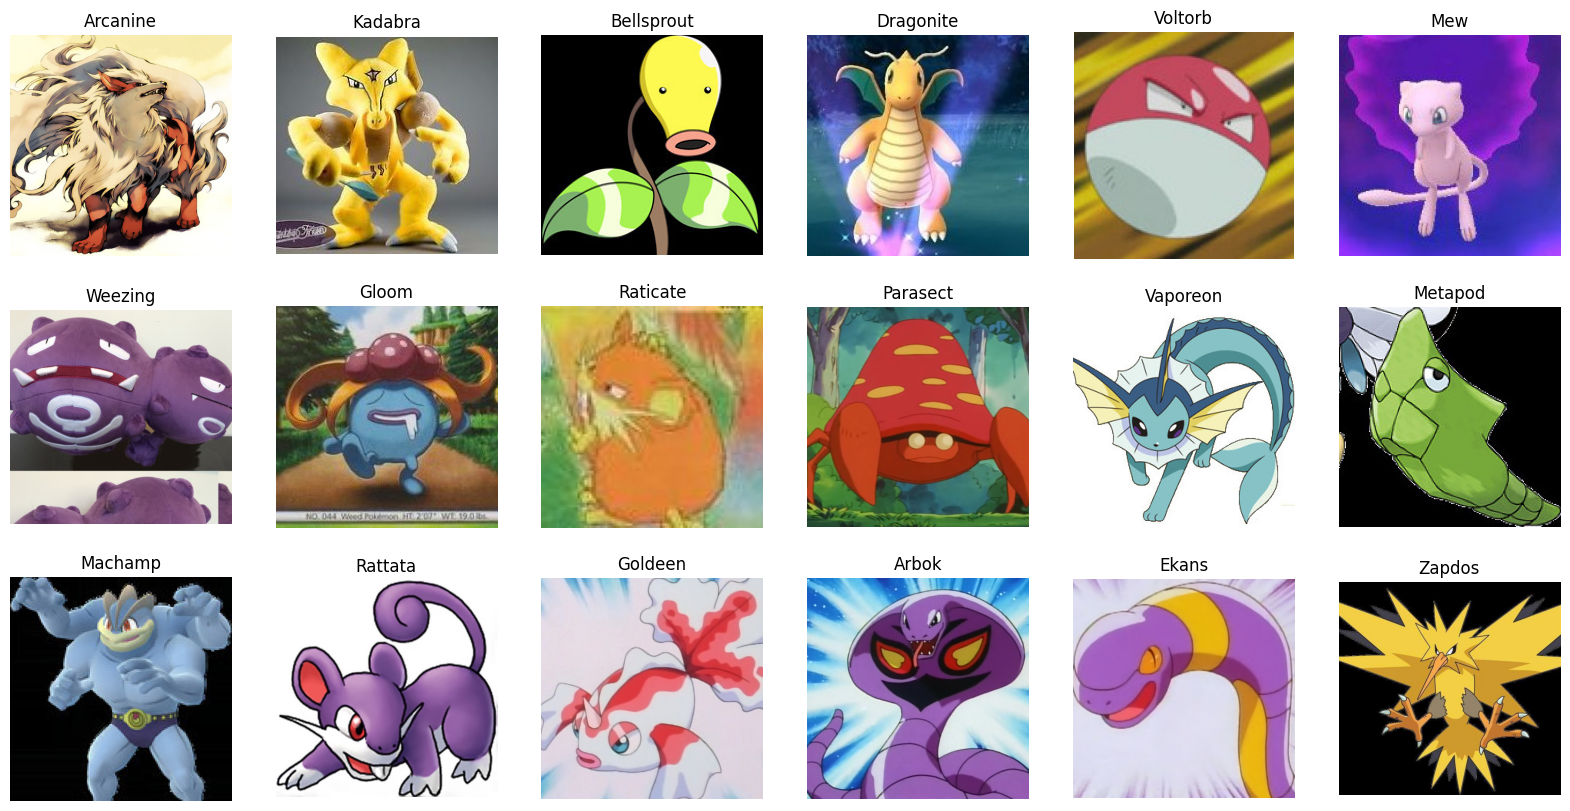

In [21]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir='C:/Users/mbres/Documents/stuff/PokemonData/train/',
                  target_class=class_name)

# Prepare data for model

In [22]:
train_dir = "C:/Users/mbres/Documents/stuff/PokemonData/train/"
test_dir = "C:/Users/mbres/Documents/stuff/PokemonData/test/"

In [23]:
# Create augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 6137 images belonging to 150 classes.
Found 684 images belonging to 149 classes.


# Basic model Buildinig (CNN Classifier)

In [24]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

c:\Users\mbres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        19,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,697,270 (10.29 MB)

 Trainable params: 2,697,270 (10.29 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history_1 = model_1.fit(train_data,
                    epochs=4,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

c:\Users\mbres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ImportError: This requires the scipy module. You can install it via `pip install scipy`

In [ ]:
model_1.evaluate(test_data)

In [ ]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

In [ ]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [ ]:
model.save('/content/drive/MyDrive/Files/image_intel/models/', save_format='tf')

In [ ]:
!ls -alrt models

In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Files/image_intel/models/models/')

In [ ]:
model_loaded.summary()

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
pred_label=model_loaded.predict(process('/content/drive/MyDrive/Files/image_intel/alto-crew-Rv3ecImL4ak-unsplash.jpg'))
print(classes[np.argmax(pred_label)])

In [ ]:
pred_label

In [ ]:
!zip -r models.zip models/